In [1]:
from utils.config import FitSettings
from utils.DataProcessor import DataProcessor
from utils.signalExtractor import SignalExtractor

import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import os

import mplhep as hep
hep.style.use(hep.style.ALICE)

# Read the data
When the data is read it must be defined in the following way: output folder containing subfolders corresponding to the datasets. 

In [2]:
directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/030225_tableReaderwME/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/190325_nominalCuts/"
datasets = [
    #"DQ_LHC22_pass7_skimmed_dielectron_kaon",
    "DQ_LHC24aj_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24af_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ag_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24al_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24am_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24an_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ao_pass1_skimmed_dielectron_kaon"
]

In [3]:
settings = FitSettings()
processor = DataProcessor(directory_to_TRoutput_from_HL, datasets, verbose=False, settings=settings)

# Read the dataset
total_data, _ = processor.read_data(read_ME=False)

******* DATASET: DQ_LHC24aj_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24af_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24ag_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24al_pass1_skimmed_dielectron_kaon
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1572020/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571953/AO2D.root/hy_1571953 is not being read properly
⚠️ Dataframe is empty. 554207, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571945/AO2D.root/hy_1571945 is not being read properly
⚠️ Dataframe is empty. 554201, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571943/AO2D.root/hy_157

In [4]:
# Preprocess the data (removing nan and relabeling columns)
total_data = processor.pre_processing(total_data)

⚠️ WARNING: 8 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 8 candidates pass no cuts - fIsBarrelSelected =0 


In [5]:
# Translate from bitmap columns and create columns with cuts being passed
config_cuts, name_electron_cuts, name_kaon_cuts = processor.read_cuts_from_configfile()

In [6]:
# This returns a warning if there is a mismatch in the entries in the histograms of the AnalyisResults.root file and the derived dataset
processor.compare_to_AnalysisResult(total_data, verbose=False)

⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24af_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ag_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24am_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24an_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ao_pass1_skimmed_dielectron_kaon/AnalysisResults.root file no

In [7]:
#plot_bins = np.linspace(3, 10, 500)
#processor.plot_datasets(total_data, bins=plot_bins)

# Read MC

In [8]:
# reading a single AO2D.root.file 
#list_of_dataframes, _ = mc_processor.read_AO2D(MCdatapath, _, _, _, "dileptonAOD.root")
#local_run_df = pd.concat(list_of_dataframes, ignore_index=True) if list_of_dataframes else pd.DataFrame()

In [9]:
MCdatapath = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/"
mc_processor = DataProcessor(MCdatapath, ["LHC25b17"], verbose=False, settings=settings)

# Read the dataset
total_mc, _ = mc_processor.read_data(read_ME=False)

******* DATASET: LHC25b17
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651883/AO2D.root
⚠️ Dataframe is empty. 556370, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651756/AO2D.root/hy_1651756 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651749/AO2D.root
⚠️ Dataframe is empty. 555965, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651743/AO2D.root/hy_1651743 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651680/AO2D.root
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651673/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_

In [10]:
total_mc = mc_processor.pre_processing(total_mc)

⚠️ WARNING: 11 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 11 candidates pass no cuts - fIsBarrelSelected =0 


In [11]:
mc_config_cuts, mc_name_electron_cuts, mc_name_kaon_cuts = mc_processor.read_cuts_from_configfile()

In [12]:
mc_processor.compare_to_AnalysisResult(total_mc, verbose=False)

# Apply cuts

In [13]:
data_with_cuts = total_data
mc_with_cuts = total_mc

tauCut = 0.0004
chi2cut = 2

In [14]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fTauxyBcandidate"] > tauCut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fTauxyBcandidate"] > tauCut]

In [15]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fChi2Bcandidate"] < chi2cut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fChi2Bcandidate"] < chi2cut]

In [16]:
jpsi_minMass = 2.8
jpsi_maxMass = 3.2
data_with_cuts = data_with_cuts.loc[(data_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(data_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]
mc_with_cuts = mc_with_cuts.loc[(mc_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(mc_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]

# Signal extraction

In [17]:
from scipy.stats import gaussian_kde

class TemplateMaker: 
    def __init__(self, mc_df: pd.DataFrame, settings: FitSettings):
        
        self.mc_df = mc_df.loc[
            (mc_df[settings.pt_column_name] > settings.pTmin) &
            (mc_df[settings.pt_column_name] < settings.pTmax)
        ]
        
        self.settings = settings

        self.number_of_bins = int((settings.fitMax-settings.fitMin)/settings.bin_width)
        self.bins = np.linspace(settings.fitMin, settings.fitMax, self.number_of_bins + 1)
        self.bin_centers = (self.bins[:-1] + self.bins[1:]) / 2
    
    def _generate_signal_template(self):
        
        df_signal = pd.concat([self.mc_df.loc[self.mc_df["fMcFlag"] == settings.signal_channels[sig]] for sig in settings.signal_channels])
        self.signal_template, _ = np.histogram(df_signal[settings.mass_column_name], bins=self.bins)
        self.signal_template_norm  = self.signal_template/np.sum(self.signal_template)
        
        self.mean_signal_mass = df_signal[settings.mass_column_name].mean()
    
    def _generate_corrbkg_template(self):
        
        self.corrbkg_templates = {}
        self.kde_corrbkg_templates = {}
        
        for corrbkg, flag in settings.background_channels.items():
            df_corrbkg = self.mc_df.loc[(self.mc_df["fMcFlag"] == flag)&(self.mc_df[settings.mass_column_name] < 5.2)]

            # templates without KDE
            corrbkg_template, _ = np.histogram(df_corrbkg[settings.mass_column_name], bins=self.bins)
            self.corrbkg_templates[corrbkg] = corrbkg_template
            
            # templates with KDE
            kde = gaussian_kde(df_corrbkg[settings.mass_column_name], bw_method=settings.kde_window)
            kde_scaled = kde(self.bin_centers) * len(df_corrbkg) * settings.bin_width  # Scale to match histogram
            self.kde_corrbkg_templates[corrbkg] = kde_scaled 

    def generate_mc_templates(self):

        self._generate_signal_template()
        self._generate_corrbkg_template()
        
        return self.mean_signal_mass, self.corrbkg_templates, self.kde_corrbkg_templates, self.bins
    
    def plot_mc_signals(self): 
        
        mc_df_binned, _ = np.histogram(self.mc_df[settings.mass_column_name], bins=self.bins)
        
        # Plot histograms
        plt.hist(self.bins[:-1], bins=self.bins, weights=mc_df_binned, alpha=0.4, label="All MC data")  # Filled histogram
        plt.hist(self.bins[:-1], bins=self.bins, weights=self.signal_template, alpha=0.4, label=r"$B^\pm \rightarrow J/\psi + K^\pm$ (exclusive)")  # Filled histogram
         
        for i in self.corrbkg_templates.keys(): 
            plt.hist(self.bins[:-1], bins=self.bins, weights=self.corrbkg_templates[i], histtype="step", linestyle="dotted", linewidth=1.5, label=i)

        plt.xlabel(settings.xaxis_label, fontsize=24)
        plt.yscale("log")
        plt.legend(loc="upper right")
        plt.show()
        #plt.("MCsignals.png")
        

In [25]:
import numpy as np
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import inspect

import matplotlib.pyplot as plt 
from matplotlib.patches import Patch

class SignalExtractor:
    def __init__(self, df: pd.DataFrame, settings: FitSettings, combkg_function='exponential'):
        self.df = df.loc[
            (df[settings.pt_column_name] > settings.pTmin) &
            (df[settings.pt_column_name] < settings.pTmax)
        ]
        self.settings = settings

        self.number_of_bins = int((settings.fitMax-settings.fitMin)/settings.bin_width)
        self.bins = np.linspace(settings.fitMin, settings.fitMax, self.number_of_bins + 1)
        self.bin_centers = (self.bins[:-1] + self.bins[1:]) / 2

        self.data_counts = None
        self.data_errors = None
        self.bin_edges = None
        
        self.combkg_function = combkg_function

    def bin_data(self):
        self.data_counts, self.bin_edges = np.histogram(self.df[self.settings.mass_column_name], bins=self.bins)
        self.data_errors = np.sqrt(self.data_counts)
        
    def _get_non_empty_bins(self):
        bin_mask = self.data_counts >= 1
        return self.bin_centers[bin_mask], self.data_counts[bin_mask], self.data_errors[bin_mask]
    
    def gauss(self, x, mu, sigma):
        return np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    
    def poly2(self, x, a, b, c):
        return a + b*x + c*x*x
    
    def corrbkg_template_func(self, x):
        total_corrbkg_template_counts = sum(self.corrbkg_template_counts.values())
        bin_index = np.digitize(x, self.template_bins) - 1 
        bin_index = np.clip(bin_index, 0, len(total_corrbkg_template_counts) - 1) 
        return total_corrbkg_template_counts[bin_index]
    
    def template_lookup(self, x, template):
        bin_index = np.digitize(x, self.bins) - 1
        bin_index = np.clip(bin_index, 0, len(template) - 1)
        return template[bin_index]

    def total_fit_func_exp(self, x, n_corrbkg, n_sig, mu, sigma, n_combkg, a):
        
        return (n_corrbkg * self.corrbkg_template_func(x)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))

    def total_fit_func_poly2(self, x, n_corrbkg, n_sig, mu, sigma, a, b, c):
        
        return (n_corrbkg * self.corrbkg_template_func(x)) + (n_sig * self.gauss(x, mu, sigma)) + self.poly2(x, a, b, c)

    def total_fit_func_poly2ratio(self, x, n_corrbkg, n_sig, mu, sigma, a, b, c, d, e, f):
        
        return (n_corrbkg * self.corrbkg_template_func(x)) + (n_sig * self.gauss(x, mu, sigma)) + (self.poly2(x, a, b, c)/self.poly2(x, d, e, f))

    def fit(self): 
    
        #exclude bins with few counts in the fit
        x_data, y_data, y_data_err = self._get_non_empty_bins()
        
        # define total fit function based on the combinatorial background defined in the initialization
        if self.combkg_function == 'exponential':
            self.total_fit_func = self.total_fit_func_exp
        elif self.combkg_function == 'second_degree_polynomial':
            self.total_fit_func = self.total_fit_func_poly2
        elif self.combkg_function == 'ratio_second_degree_polynomials':
            self.total_fit_func = self.total_fit_func_poly2ratio
        else:
            raise ValueError(f"Unknown background function: {self.combkg_function}")

        # define staring values for the fit
        param_values = {}
        func_params = inspect.signature(self.total_fit_func).parameters
        for f in func_params: 
            if f=='x': continue
            elif f=='n_sig': param_values[f] = 100
            elif f=='mu': param_values[f] = 5.3
            elif f=='sigma': param_values[f] = 0.01
            else: param_values[f] = 1
        print("Starting values for the fit: ", param_values)

        # ----- Peform fit ------
        least_squares = LeastSquares(x_data, y_data, y_data_err, self.total_fit_func)
        minuit = Minuit(least_squares, **param_values)
        if "sigma" in param_values: minuit.limits["sigma"] = (0.02, 0.5)
        if "n_sig" in param_values: minuit.limits["n_sig"] = (0., None) # scaling must be positive
        if "n_corrbkg" in param_values: minuit.limits["n_sig"] = (0., None) 
        
        minuit.migrad()
        self.fit_params = minuit.values

    def plot_invariant_mass(self, plot_contributions=False):
        
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.errorbar(self.bin_centers, self.data_counts, yerr=self.data_errors, fmt='o', color='black', ecolor='black', capsize=0, label='Data')

        x_fit = np.linspace(min(self.bin_centers), max(self.bin_centers), 500)
            
        # ----------- total fit ----------- 
        ax.plot(x_fit, self.total_fit_func(x_fit, *self.fit_params), linewidth=3, color=settings.color_palette["10"][3], label='Total fit')
        
        # ----------- signal (assuming gaussian signal) ----------- 
        sig_color = settings.color_palette["10"][0]
        signal = self.gauss(x_fit, self.fit_params["mu"], self.fit_params["sigma"])
        ax.plot(x_fit, self.fit_params["n_sig"]*signal, linewidth=2, color=sig_color)
        ax.fill_between(x_fit, self.fit_params["n_sig"]*signal, 0, color=sig_color, alpha=.5)
        legend_patches = [Patch(color=sig_color, alpha=0.5, label=r"B$^\pm \rightarrow J/\psi + K^\pm$")]
        
        # ----------- combinatorial background ----------- 
        if self.combkg_function == "exponential": combbkg_plot = np.exp(x_fit, self.fit_params["n_combkg"] * np.exp(self.fit_params["a"] * x_fit))
        elif self.combkg_function == "second_degree_polynomial": combbkg_plot = self.poly2(x_fit, self.fit_params["a"], self.fit_params["b"], self.fit_params["c"])
        elif self.combkg_function == "ratio_second_degree_polynomials": combbkg_plot = self.poly2(x_fit, self.fit_params["a"], self.fit_params["b"], self.fit_params["c"])/self.poly2(x_fit, self.fit_params["d"], self.fit_params["e"], self.fit_params["f"])
        else:
            raise ValueError(f"Unknown background function: {self.combkg_function}")
        ax.plot(x_fit, combbkg_plot, ls='dashdot', linewidth=3, label="Comb.background", color=settings.color_palette["10"][2])

        # ----------- correlated background ----------- 
        stacked_corr_bkg = np.zeros_like(combbkg_plot)
        for corrbkg_source, color in zip(self.corrbkg_template_counts.keys(), [settings.color_palette["10"][1], settings.color_palette["10"][5], settings.color_palette["10"][7]]): 
            scaled_template = self.fit_params["n_corrbkg"] * self.template_lookup(x_fit, self.corrbkg_template_counts[corrbkg_source])
            ax.fill_between(
                    x_fit,
                    stacked_corr_bkg,  # Lower bound
                    stacked_corr_bkg + scaled_template,  # Upper bound
                    color=color,
                    alpha=0.6
                )
            stacked_corr_bkg  += scaled_template
            legend_patches.append(Patch(color=color, alpha=0.6, label=corrbkg_source))
            
        # ----------- line and text ----------- 
        plt.axvline(x=settings.pdg_mass_b_meson, color=settings.color_palette["10"][3], linestyle='--', linewidth=1)
        plt.text(5.28, plt.ylim()[1] * 0.2, r"$m^{B^\pm}_{\text{PDG}}$", color=settings.color_palette["10"][3], fontsize=14, rotation=270, verticalalignment='top')
        
        # axis
        ax.set_ylabel(fr'Entries per {settings.bin_width*1000:.0f} MeV/$c^2$',fontsize=22)
        ax.set_xlabel(r'$m_{eeK^\pm} - m_{ee} + m_{J/\psi, DPG}$ (GeV/$c^2$)',fontsize=22)
        ax.set_xlim([settings.fitMin, settings.fitMax])
        ax.set_ylim([0, self.data_counts.max()*1.2])
        ax.legend(handles=ax.get_legend_handles_labels()[0] + legend_patches, loc="upper right", fontsize=20)

        fig.tight_layout()

Starting values for the fit:  {'n_corrbkg': 1, 'n_sig': 100, 'mu': 5.3, 'sigma': 0.01, 'n_combkg': 1, 'a': 1}


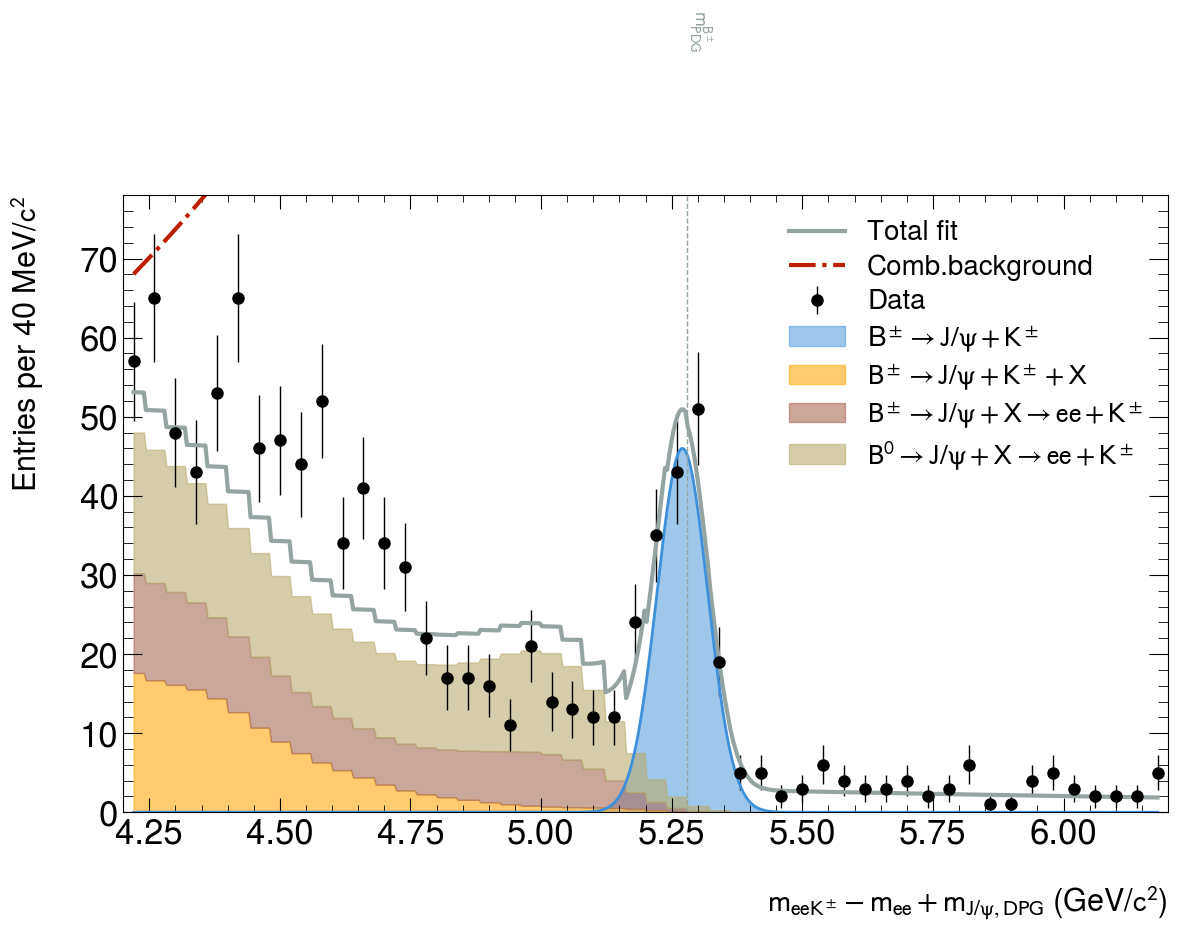

In [26]:
# I would like it to be: you initialize the fit with wanted signal shape, wanted parameterization for combinatorial background, and template for correlated background
# FOCUS: Get the signal extraction to work in a loop

# When you managed this: do this: 

# 3: fix the ratio of the correlated background
# 4: Make it fit the total correlated background
# MAKE SURE YOU GET THE SAME RESULT! 
# 2: shift the correlated background

settings = FitSettings(pTmin=8, pTmax=10, fitMin=4.2, fitMax=6.2, bin_width=0.04, kde_window=0.2)

# generate MC templates
templateMaker = TemplateMaker(mc_with_cuts, settings=settings)
mc_signal_mass, corrbkg_template, kde_corrbkg_template, template_bins = templateMaker.generate_mc_templates()
#templateMaker.plot_mc_signals()

extractor = SignalExtractor(data_with_cuts, settings=settings, combkg_function="exponential")

# initialize SE with output from template maker 
#extractor.mc_signal_mass = mc_signal_mass
extractor.template_bins = template_bins
extractor.corrbkg_template_counts = kde_corrbkg_template
extractor.bin_data()
extractor.fit()

extractor.plot_invariant_mass()

In [20]:
def SEbin4(data_with_cuts, mc_with_cuts, combkg_function):
    settings = FitSettings(pTmin=8, pTmax=10, fitMin=4.2, fitMax=6.2, bin_width=0.02, kde_window=0.2)

    # generate MC templates
    templateMaker = TemplateMaker(mc_with_cuts, settings=settings)
    signal_template, corrbkg_template, kde_corrbkg_template, template_bins = templateMaker.generate_mc_templates()
    #templateMaker.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings, combkg_function=combkg_function)
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template['$B^\\pm \\rightarrow J/\\psi + K^\\pm + X$']
    extractor.bin_data()
    extractor.fit()

    extractor.plot_invariant_mass()

In [21]:
def SEbin5(data_with_cuts, mc_with_cuts, combkg_function):
    settings = FitSettings(pTmin=10, pTmax=14, fitMin=4.2, fitMax=6.2, bin_width=0.02, kde_window=0.2)

    # generate MC templates
    templateMaker = TemplateMaker(mc_with_cuts, settings=settings)
    signal_template, corrbkg_template, kde_corrbkg_template, template_bins = templateMaker.generate_mc_templates()
    #templateMaker.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings, combkg_function=combkg_function)
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template['$B^\\pm \\rightarrow J/\\psi + K^\\pm + X$']
    extractor.bin_data()
    extractor.fit()

    extractor.plot_invariant_mass()

In [22]:
for t in ["exponential", "second_degree_polynomial"]:
    i = 2.8
    datatest = data_with_cuts.loc[(data_with_cuts["fMassDileptonCandidate"] > i)&(data_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]
    mctest = mc_with_cuts.loc[(mc_with_cuts["fMassDileptonCandidate"] > i)&(mc_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]

    SEbin4(datatest, mctest, combkg_function=t)
    SEbin5(datatest, mctest, combkg_function=t)

Starting values for the fit:  {'n_corrbkg': 1, 'n_sig': 100, 'mu': 5.3, 'sigma': 0.01, 'n_combkg': 1, 'a': 1}


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
mc_df_binned, _ = np.histogram(mc_df2024['correctedMass'], bins=bins)
mc_signal_binned, _ = np.histogram(mc_signal['correctedMass'], bins=bins)
mc_notexclusive_binned, _ = np.histogram(mc_not_exclusive['correctedMass'], bins=bins)
mc_kaon_res_binned, _ = np.histogram(mc_kaon_res['correctedMass'], bins=bins)
mc_b0_binned, _ = np.histogram(mc_b0['correctedMass'], bins=bins)

# Plot histograms
plt.hist(bins[:-1], bins=bins, weights=mc_df_binned, alpha=0.4, label="All MC data")  # Filled histogram
plt.hist(bins[:-1], bins=bins, weights=mc_signal_binned, alpha=0.4, label=r"$B^\pm \rightarrow J/\psi + K^\pm$ (exclusive)")  # Filled histogram

# Dotted line histograms
plt.hist(bins[:-1], bins=bins, weights=mc_notexclusive_binned, histtype="step", linestyle="dotted", linewidth=1.5, label=r"$B^\pm \rightarrow J/\psi + K^\pm + X$")
plt.hist(bins[:-1], bins=bins, weights=mc_kaon_res_binned, histtype="step", linestyle="dotted", linewidth=1.5, label=r"$B^\pm \rightarrow J/\psi + X \rightarrow ee + K^\pm$")
plt.hist(bins[:-1], bins=bins, weights=mc_b0_binned, histtype="step", linestyle="dotted", linewidth=1.5, label=r"$B^0 \rightarrow J/\psi + X \rightarrow ee + K^\pm$")

# Labels and legenda
plt.title("MC signal contributions before cuts")
plt.xlabel(r'$m_{eeK^\pm} - m_{ee} + m_{J\psi, DPG}$ (GeV/$c^2$)', fontsize=24)
plt.yscale("log")
plt.legend(loc="upper right")
plt.show()
#plt.("MCsignals.png")

In [ ]:
yield_per_cut_combination = pd.DataFrame()
#for i, jpsi_maxMass in enumerate([3.13, 3.15, 3.2, 3.25, 3.27]):
    #for j, jpsi_minMass in enumerate([2.5, 2.6, 2.7, 2.8, 2.9, 3.0]):
for i, jpsi_maxMass in enumerate([ 3.25, 3.27]):
    for j, jpsi_minMass in enumerate([2.7, 2.8]):
